In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv('/content/BTC-USD.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,10975.599609,6783119872
2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,11074.599609,5138500096
2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,11323.200195,6608309760
2017-12-04,11315.400391,11657.200195,11081.799805,11657.200195,11657.200195,6132409856
2017-12-05,11685.700195,12032.000000,11604.599609,11916.700195,11916.700195,6895260160


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1941 entries, 2018-01-01 to 2023-04-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1941 non-null   float64
 1   High       1941 non-null   float64
 2   Low        1941 non-null   float64
 3   Close      1941 non-null   float64
 4   Adj Close  1941 non-null   float64
 5   Volume     1941 non-null   float64
dtypes: float64(6)
memory usage: 106.1 KB


In [ ]:
# Số hàng và số cột trong df
df.shape

(2023, 6)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2023.0,2.064931e+04,1.624285e+04,3.236275e+03,8.107687e+03,1.240076e+04,3.029153e+04,6.754973e+04
High,2023.0,2.115103e+04,1.666004e+04,3.275378e+03,8.261824e+03,1.312953e+04,3.067973e+04,6.878962e+04
Low,2023.0,2.009004e+04,1.576031e+04,3.191303e+03,7.885360e+03,1.180670e+04,2.937141e+04,6.638206e+04
Close,2023.0,2.065476e+04,1.623741e+04,3.236762e+03,8.106151e+03,1.257381e+04,3.030564e+04,6.756683e+04
Adj Close,2023.0,2.065476e+04,1.623741e+04,3.236762e+03,8.106151e+03,1.257381e+04,3.030564e+04,6.756683e+04
Volume,2023.0,2.592997e+10,1.914825e+10,2.923670e+09,1.298836e+10,2.340074e+10,3.467315e+10,3.509679e+11


In [ ]:
# Kiểm tra xem có bao nhiêu dòng dữ liệu trong tất cả các cột có giá trị là null
df.isnull().sum().sort_values(ascending=False)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Loại bỏ các trường không cần thiết:
df = df.drop(columns = ['Adj Close'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,6783119872
2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,5138500096
2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,6608309760
2017-12-04,11315.400391,11657.200195,11081.799805,11657.200195,6132409856
2017-12-05,11685.700195,12032.000000,11604.599609,11916.700195,6895260160


**I/Chuẩn bị dữ liệu**

**1.Tách dữ liệu thành các tập X(đầu vào) và tập y(đầu ra)**

In [ ]:
x = df[['Open','High','Low','Volume']]
y = df['Close']

In [ ]:
x.head()

,Open,High,Low,Volume
Date,,,,
2018-01-01,14112.2002,14112.20020,13154.70020,1.029120e+10
2018-01-02,13625.0000,15444.59961,13163.59961,1.684660e+10
2018-01-03,14978.2002,15572.79981,14844.50000,1.687190e+10
2018-01-04,15270.7002,15739.70020,14522.20020,2.178320e+10
2018-01-05,15477.2002,17705.19922,15202.79981,2.384090e+10


In [ ]:
y.head()

Date
2018-01-01    13657.20020
2018-01-02    14982.09961
2018-01-03    15201.00000
2018-01-04    15599.20020
2018-01-05    17429.50000
Name: Close, dtype: float64

In [ ]:
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

**II/Cắt dữ liệu thành tập train và test, validate**

In [ ]:
from sklearn.model_selection import train_test_split

n_rows = len(df)
train_rows = int(n_rows * 0.5)
test_rows = int(n_rows * 0.3)
val_rows = len(df) - train_rows - test_rows
# Chia tập dữ liệu thành 3 tập train, test và validate
X_train = x[:train_rows]
X_test = x[train_rows:train_rows+test_rows]
X_validate = x[train_rows+test_rows:]

y_train = y[:train_rows]
y_test = y[train_rows:train_rows+test_rows]
y_validate = y[train_rows+test_rows:]

In [ ]:
X_train

,Open,High,Low,Volume
Date,,,,
2018-01-01,14112.20020,14112.20020,13154.70020,1.029120e+10
2018-01-02,13625.00000,15444.59961,13163.59961,1.684660e+10
2018-01-03,14978.20020,15572.79981,14844.50000,1.687190e+10
2018-01-04,15270.70020,15739.70020,14522.20020,2.178320e+10
2018-01-05,15477.20020,17705.19922,15202.79981,2.384090e+10
...,...,...,...,...
2021-09-15,47098.00000,48450.46875,46773.32813,3.048450e+10
2021-09-16,48158.90625,48486.82813,47079.55859,3.176429e+10
2021-09-17,47771.00391,48160.92188,46832.52344,2.872771e+10


In [ ]:
y_train.head()

Date
2018-01-01    13657.20020
2018-01-02    14982.09961
2018-01-03    15201.00000
2018-01-04    15599.20020
2018-01-05    17429.50000
Name: Close, dtype: float64

In [ ]:
# Tiêu chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_validate)

**III/Áp dụng thuật toán và đánh giá mô hình**

**1/Mô hình Deep Feedforward Neural Network**

***tf.keras.models.Sequential(): Đây là một kiểu mô hình trong thư viện Keras của TensorFlow, cho phép xây dựng một mạng neural truyền thẳng bằng cách xếp chồng các layer lên nhau theo thứ tự tuần tự.***

***tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)): Đây là một layer trong mạng neural truyền thẳng, cụ thể là layer Dense (fully connected layer). Các tham số có ý nghĩa như sau:***

- 64: Đây là số lượng units (hoặc neurons) trong layer. Trong trường hợp này, layer này có 64 neurons.
- activation='relu': Đây là hàm kích hoạt được áp dụng cho outputs của layer. Ở đây, hàm kích hoạt được sử dụng là ReLU (Rectified Linear Unit), một hàm phi tuyến được sử dụng phổ biến trong mạng neural.
- input_shape=(4,): Đây là kích thước đầu vào của layer. Trong trường hợp này, đầu vào có kích thước (4,) tức là một vector với 4 phần tử. Layer đầu tiên của mạng thông thường sẽ có tham số input_shape để xác định kích thước của đầu vào.

***tf.keras.layers.Dense(64, activation='relu'): Đây là một layer Dense khác trong mạng neural. Các tham số tương tự như ở trên.***

***tf.keras.layers.Dense(1): Đây là layer Dense cuối cùng trong mạng neural. Các tham số của layer này không có hàm kích hoạt, vì đây là layer đầu ra của mạng. Layer này có một unit để dự đoán giá trị đầu ra duy nhất.***

***model.compile(optimizer='adam', loss='mean_squared_error'): Hàm compile() được sử dụng để cấu hình quá trình huấn luyện của mô hình. Các tham số có ý nghĩa như sau:***

- optimizer='adam': Đây là thuật toán tối ưu hóa được sử dụng trong quá trình huấn luyện. Trong trường hợp này, thuật toán Adam được sử dụng. Adam là một thuật toán tối ưu hóa tự điều chỉnh, phổ biến trong huấn luyện mạng neural.
- `loss='mean_squared_error

In [ ]:
# Xây dựng mô hình Deep Feedforward Neural Network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


In [ ]:
# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Huấn luyện mô hình
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_validate))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 73354976.0000 - val_loss: 545631808.0000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 73316976.0000 - val_loss: 545206144.0000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 73211120.0000 - val_loss: 544147072.0000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 72972936.0000 - val_loss: 542007424.0000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 72529256.0000 - val_loss: 538277504.0000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 71801904.0000 - val_loss: 532449984.0000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 70709032.0000 - val_loss: 524062304.0000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 69196928.0000 - val_loss: 512677280.0000
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 67177864.0000 -

In [ ]:
# Dự đoán giá Close trên tập test, validate
y_pred = model.predict(X_test_scaled)
y_pred_val = model.predict(X_val_scaled)

13/13 [==============================] - 0s 2ms/step


**Đánh giá mô hình trên tập Test với tỉ lệ 5:3:2**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
# 1. mse:tổng bình phương sai số trên tập mẫu (Giá trị MSE càng nhỏ, mô hình dự báo càng chính xác.)
mse_linear = metrics.mean_squared_error(y_test,model.predict(X_test_scaled))

# 2. rmse: căn của tổng bình phương sai số trên tập mẫu,được sử dụng để đánh giá sai số trung bình giữa giá trị dự báo và giá trị thực tế
#(giá trị này càng nhỏ thì mô hình càng chính xác)
rmse_linear = np.sqrt(mse_linear)

# 3. mae : trị tuyệt đối trung bình(giá trị này càng nhỏ thì mô hình càng chính xác)
mae_linear = metrics.mean_absolute_error(y_test,model.predict(X_test_scaled))

#4. mape : tính toán độ sai lệch trung bình giữa các giá trị dự đoán và giá trị thực tế dưới dạng phần trăm(Giá trị MAPE càng nhỏ thì độ chính xác của mô hình càng cao)
#  mô hình có MAPE dưới 10% được xem là rất tốt
mape_linear = metrics.mean_absolute_percentage_error(y_test, model.predict(X_test_scaled))

# 5.r2_score(): đánh giá xem mô hình có phù hợp và tốt hay không, trả về giá trị nằm trong khoảng từ 0 đến 1,
# với giá trị 0 có nghĩa là không có mối quan hệ, với giá trị là 1 có nghĩa là mô hình phù hợp và tốt 100%.
r2_linear = r2_score(y_test , model.predict(X_test_scaled))

print('MSE: ' , mse_linear)
print('RMSE: ' , rmse_linear)
print('MAE: ' , mae_linear)
print('MAPE: ', mape_linear * 100)
print('R2_squared: ' , r2_linear)

19/19 [==============================] - 0s 2ms/step
MSE:  5886874.892133594
RMSE:  2426.2882953461226
MAE:  2015.8935435017527
MAPE:  4.653895377576016
R2_squared:  0.9722167761690877


**Đánh giá mô hình trên tập Test với tỉ lệ 6:2:2**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
# 1. mse:tổng bình phương sai số trên tập mẫu (Giá trị MSE càng nhỏ, mô hình dự báo càng chính xác.)
mse_linear = metrics.mean_squared_error(y_test,model.predict(X_test_scaled))

# 2. rmse: căn của tổng bình phương sai số trên tập mẫu,được sử dụng để đánh giá sai số trung bình giữa giá trị dự báo và giá trị thực tế
#(giá trị này càng nhỏ thì mô hình càng chính xác)
rmse_linear = np.sqrt(mse_linear)

# 3. mae : trị tuyệt đối trung bình(giá trị này càng nhỏ thì mô hình càng chính xác)
mae_linear = metrics.mean_absolute_error(y_test,model.predict(X_test_scaled))

#4. mape : tính toán độ sai lệch trung bình giữa các giá trị dự đoán và giá trị thực tế dưới dạng phần trăm(Giá trị MAPE càng nhỏ thì độ chính xác của mô hình càng cao)
#  mô hình có MAPE dưới 10% được xem là rất tốt
mape_linear = metrics.mean_absolute_percentage_error(y_test, model.predict(X_test_scaled))

# 5.r2_score(): đánh giá xem mô hình có phù hợp và tốt hay không, trả về giá trị nằm trong khoảng từ 0 đến 1,
# với giá trị 0 có nghĩa là không có mối quan hệ, với giá trị là 1 có nghĩa là mô hình phù hợp và tốt 100%.
r2_linear = r2_score(y_test , model.predict(X_test_scaled))

print('MSE: ' , mse_linear)
print('RMSE: ' , rmse_linear)
print('MAE: ' , mae_linear)
print('MAPE: ', mape_linear * 100)
print('R2_squared: ' , r2_linear)

13/13 [==============================] - 0s 2ms/step
MSE:  5650197.7291900655
RMSE:  2377.014457084783
MAE:  2098.7228352237
MAPE:  4.5138645471909715
R2_squared:  0.9284946076825888


**Đánh giá mô hình trên tập Validate tỉ lệ 6:2:2**

In [ ]:

mse = metrics.mean_squared_error(y_validate, y_pred_val)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_validate, y_pred_val)
mape = metrics.mean_absolute_percentage_error(y_validate, y_pred_val)
r2 = r2_score(y_validate, y_pred_val)

# In ra kết quả đánh giá hiệu suất của mô hình trên tập dữ liệu validate
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape * 100)
print('R2-squared:', r2)

MSE: 930815.6799472367
RMSE: 964.787893760715
MAE: 746.6302460290949
MAPE: 3.1473085160534526
R2-squared: 0.9524361333067507


**Đánh giá mô hình trên tập Test với tỉ lệ 7:2:1**

In [ ]:
from sklearn import linear_model , metrics
from sklearn.metrics import r2_score

In [ ]:
# 1. mse:tổng bình phương sai số trên tập mẫu (Giá trị MSE càng nhỏ, mô hình dự báo càng chính xác.)
mse_linear = metrics.mean_squared_error(y_test,model.predict(X_test_scaled))

# 2. rmse: căn của tổng bình phương sai số trên tập mẫu,được sử dụng để đánh giá sai số trung bình giữa giá trị dự báo và giá trị thực tế
#(giá trị này càng nhỏ thì mô hình càng chính xác)
rmse_linear = np.sqrt(mse_linear)

# 3. mae : trị tuyệt đối trung bình(giá trị này càng nhỏ thì mô hình càng chính xác)
mae_linear = metrics.mean_absolute_error(y_test,model.predict(X_test_scaled))

#4. mape : tính toán độ sai lệch trung bình giữa các giá trị dự đoán và giá trị thực tế dưới dạng phần trăm(Giá trị MAPE càng nhỏ thì độ chính xác của mô hình càng cao)
#  mô hình có MAPE dưới 10% được xem là rất tốt
mape_linear = metrics.mean_absolute_percentage_error(y_test, model.predict(X_test_scaled))

# 5.r2_score(): đánh giá xem mô hình có phù hợp và tốt hay không, trả về giá trị nằm trong khoảng từ 0 đến 1,
# với giá trị 0 có nghĩa là không có mối quan hệ, với giá trị là 1 có nghĩa là mô hình phù hợp và tốt 100%.
r2_linear = r2_score(y_test , model.predict(X_test_scaled))

print('MSE: ' , mse_linear)
print('RMSE: ' , rmse_linear)
print('MAE: ' , mae_linear)
print('MAPE: ', mape_linear * 100)
print('R2_squared: ' , r2_linear)

13/13 [==============================] - 0s 2ms/step
MSE:  1063074.5336063677
RMSE:  1031.0550584747489
MAE:  754.1309947670172
MAPE:  2.2333749986972897
R2_squared:  0.9946278590456908


**Đánh giá mô hình trên tập Validate tỉ lệ 7:2:1**

In [ ]:


mse = metrics.mean_squared_error(y_validate, y_pred_val)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_validate, y_pred_val)
mape = metrics.mean_absolute_percentage_error(y_validate, y_pred_val)
r2 = r2_score(y_validate, y_pred_val)

# In ra kết quả đánh giá hiệu suất của mô hình trên tập dữ liệu validate
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape * 100)
print('R2-squared:', r2)

MSE: 290681.2913202197
RMSE: 539.1486727427043
MAE: 445.19336901416256
MAPE: 1.8463546624204594
R2-squared: 0.9853908295683849


**Dự đoán giá Close ở 30 ngày tiếp theo**

In [ ]:
# Cách 1
last_data = df[-1:].drop('Close', axis=1)
input_data = scaler.transform(last_data)
y_next_30_days = model.predict(np.tile(input_data, (30, 1)))

1/1 [==============================] - 0s 22ms/step


In [ ]:
# Cách 2
# Dự đoán giá Close cho 30 ngày tiếp theo
x_scaled = scaler.fit_transform(x)
last_30_days = x_scaled[-30:]
predictions_30 = model.predict(last_30_days)

# In kết quả dự đoán
print('Giá Close ở 30 ngày tiếp theo:')
for i, prediction in enumerate(predictions_30):
    print(f"Day {i+1}: {prediction[0]}")

1/1 [==============================] - 0s 25ms/step
Giá Close ở 30 ngày tiếp theo:
Day 1: 23405.818359375
Day 2: 23458.568359375
Day 3: 23134.3984375
Day 4: 23035.849609375
Day 5: 23153.224609375
Day 6: 23041.181640625
Day 7: 23352.142578125
Day 8: 23299.90625
Day 9: 22726.818359375
Day 10: 22936.9921875
Day 11: 22887.923828125
Day 12: 23592.568359375
Day 13: 24223.947265625
Day 14: 23959.744140625
Day 15: 23782.115234375
Day 16: 23425.396484375
Day 17: 23284.865234375
Day 18: 23263.40625
Day 19: 23279.71875
Day 20: 23264.083984375
Day 21: 22945.279296875
Day 22: 23468.083984375
Day 23: 22811.634765625
Day 24: 22839.052734375
Day 25: 22876.685546875
Day 26: 22308.583984375
Day 27: 22337.244140625
Day 28: 22517.19921875
Day 29: 22206.541015625
Day 30: 21934.90625


**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST và validate tỉ lệ 5:3:2**




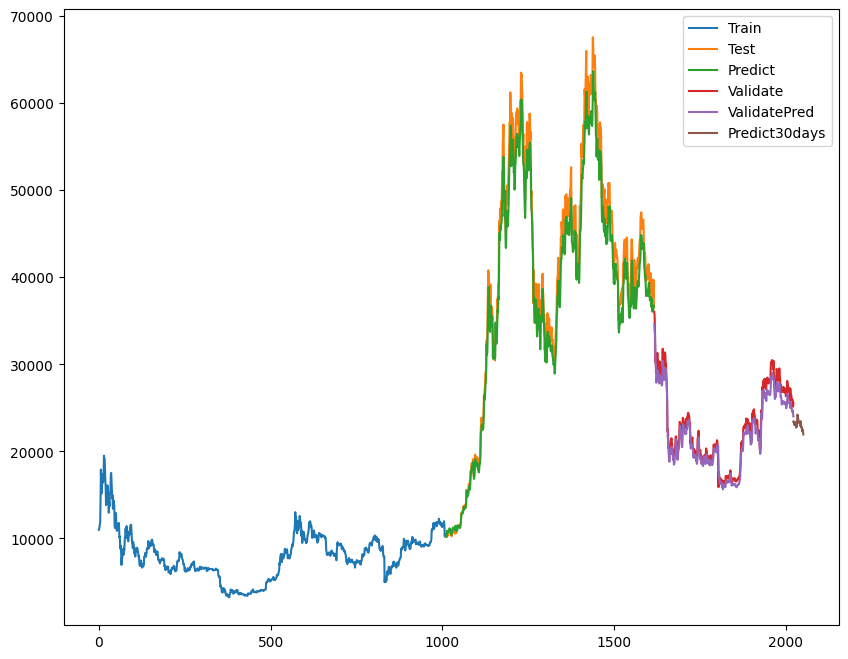

In [ ]:

# 14.Vẽ hình
plt.figure(figsize=(10,8))

train_data_index = pd.RangeIndex(start=0, stop=train_rows, step=1)
plt.plot(train_data_index,y_train)
test_data_index = pd.RangeIndex(start=train_rows, stop=train_rows+test_rows, step=1)
plt.plot(test_data_index,y_test)
test_data_index = pd.RangeIndex(start=train_rows, stop=train_rows+test_rows, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_rows+test_rows, stop=train_rows+test_rows+val_rows, step=1)
plt.plot(val_data_index,y_validate)
val_data_index = pd.RangeIndex(start=train_rows+test_rows, stop=train_rows+test_rows+val_rows, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
plt.plot(prediect_data_index,predictions_30)
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST và validate tỉ lệ 6:2:2**




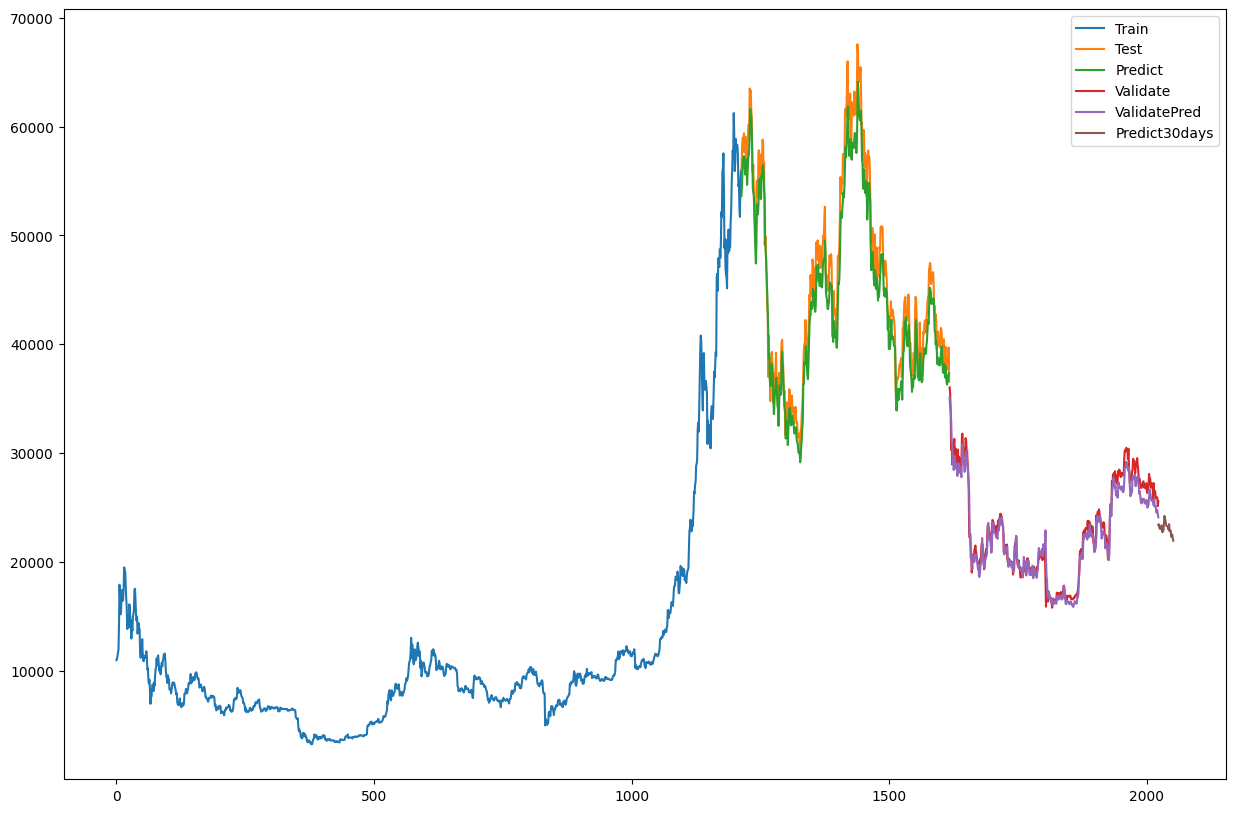

In [ ]:

# 14.Vẽ hình
plt.figure(figsize=(15,10))

train_data_index = pd.RangeIndex(start=0, stop=train_rows, step=1)
plt.plot(train_data_index,y_train)
test_data_index = pd.RangeIndex(start=train_rows, stop=train_rows+test_rows, step=1)
plt.plot(test_data_index,y_test)
test_data_index = pd.RangeIndex(start=train_rows, stop=train_rows+test_rows, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_rows+test_rows, stop=train_rows+test_rows+val_rows, step=1)
plt.plot(val_data_index,y_validate)
val_data_index = pd.RangeIndex(start=train_rows+test_rows, stop=train_rows+test_rows+val_rows, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
plt.plot(prediect_data_index,predictions_30)
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST và Validate tỉ lệ 7:2:1**




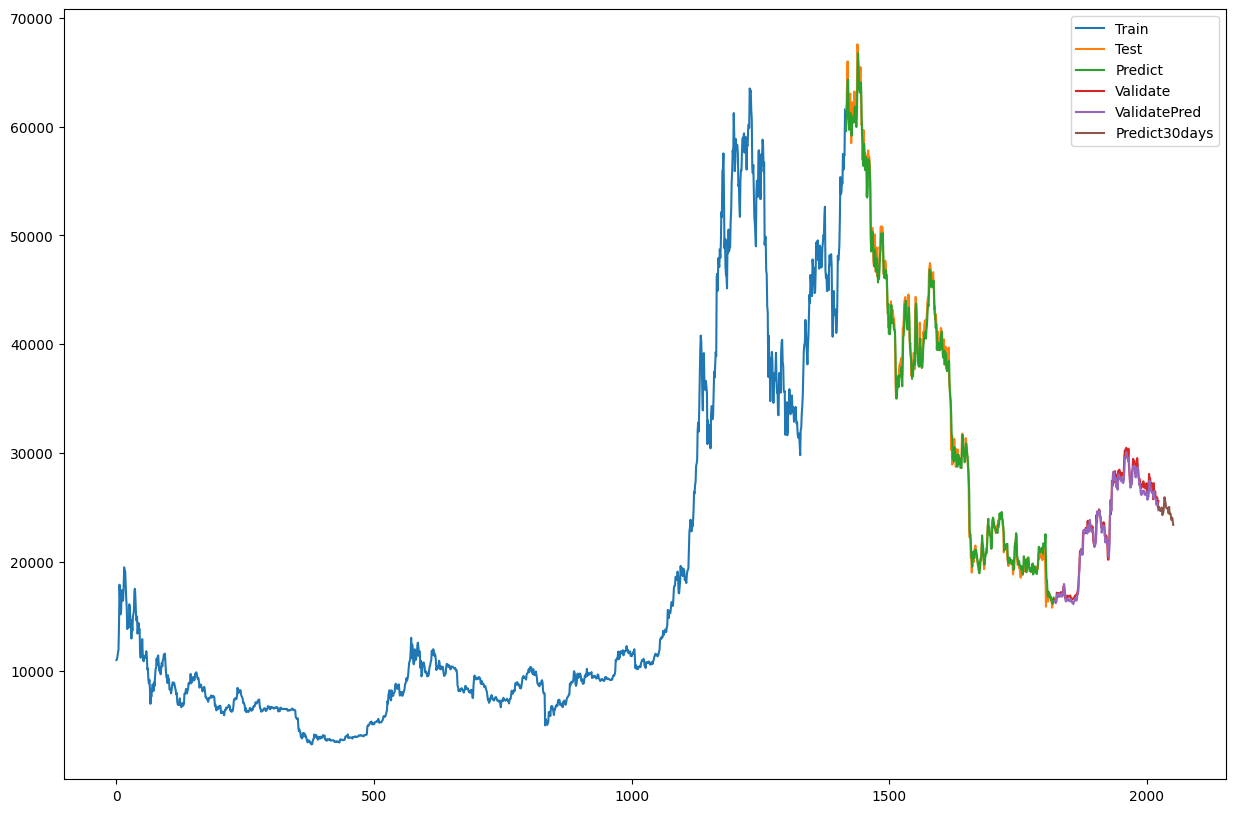

In [ ]:

# 14.Vẽ hình
plt.figure(figsize=(15,10))

train_data_index = pd.RangeIndex(start=0, stop=train_rows, step=1)
plt.plot(train_data_index,y_train)
test_data_index = pd.RangeIndex(start=train_rows, stop=train_rows+test_rows, step=1)
plt.plot(test_data_index,y_test)
test_data_index = pd.RangeIndex(start=train_rows, stop=train_rows+test_rows, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_rows+test_rows, stop=train_rows+test_rows+val_rows, step=1)
plt.plot(val_data_index,y_validate)
val_data_index = pd.RangeIndex(start=train_rows+test_rows, stop=train_rows+test_rows+val_rows, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
plt.plot(prediect_data_index,predictions_30)
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()